<a href="https://colab.research.google.com/github/LambaBITS/CV_BITS_Sem3_Webinars/blob/main/to_share.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

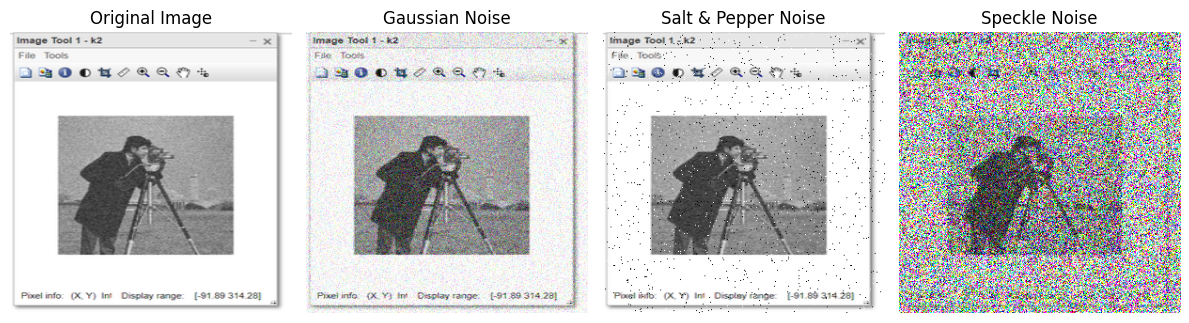

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

# Load the clean image
img = cv2.imread('./denosing.png')
img = cv2.resize(img, (300, 300))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# --- 1. Add Gaussian Noise ---
def add_gaussian_noise(image, mean=0, std=25):
    noise = np.random.normal(mean, std, image.shape).astype(np.float32)
    noisy = image.astype(np.float32) + noise
    return np.clip(noisy, 0, 255).astype(np.uint8)

# --- 2. Add Salt & Pepper Noise ---
def add_salt_pepper_noise(image, salt_prob=0.01, pepper_prob=0.01):
    noisy = np.copy(image)
    total_pixels = image.shape[0] * image.shape[1]

    # Salt noise
    for _ in range(int(total_pixels * salt_prob)):
        i = random.randint(0, image.shape[0] - 1)
        j = random.randint(0, image.shape[1] - 1)
        noisy[i, j] = [255, 255, 255]

    # Pepper noise
    for _ in range(int(total_pixels * pepper_prob)):
        i = random.randint(0, image.shape[0] - 1)
        j = random.randint(0, image.shape[1] - 1)
        noisy[i, j] = [0, 0, 0]

    return noisy

# --- 3. Add Speckle Noise ---
def add_speckle_noise(image):
    noise = np.random.randn(*image.shape).astype(np.float32)
    noisy = image + image * noise
    return np.clip(noisy, 0, 255).astype(np.uint8)

# Apply noise
gaussian_noisy = add_gaussian_noise(img)
sp_noisy = add_salt_pepper_noise(img)
speckle_noisy = add_speckle_noise(img)

# Convert to RGB for matplotlib display
gaussian_rgb = cv2.cvtColor(gaussian_noisy, cv2.COLOR_BGR2RGB)
sp_rgb = cv2.cvtColor(sp_noisy, cv2.COLOR_BGR2RGB)
speckle_rgb = cv2.cvtColor(speckle_noisy, cv2.COLOR_BGR2RGB)

# Plot the images
titles = ['Original Image', 'Gaussian Noise', 'Salt & Pepper Noise', 'Speckle Noise']
images = [img_rgb, gaussian_rgb, sp_rgb, speckle_rgb]

plt.figure(figsize=(12, 6))
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
gaussian_blur =   cv2.blur(img, (5, 5))
#cv2.GaussianBlur() – Gaussian Weighted Blur
gaussian_blur = cv2.GaussianBlur(img, (5, 5), sigmaX=0)
#cv2.medianBlur() – Median Filtering
median_blur = cv2.medianBlur(img, 5)
#cv2.bilateralFilter() – Edge-Preserving Blur
bilateral = cv2.bilateralFilter(img, d=9, sigmaColor=75, sigmaSpace=75)
#cv2.fastNlMeansDenoisingColored() – Non-Local Means for Color Images
denoised = cv2.fastNlMeansDenoisingColored(img, None, h=10, hColor=10, templateWindowSize=7, searchWindowSize=21)


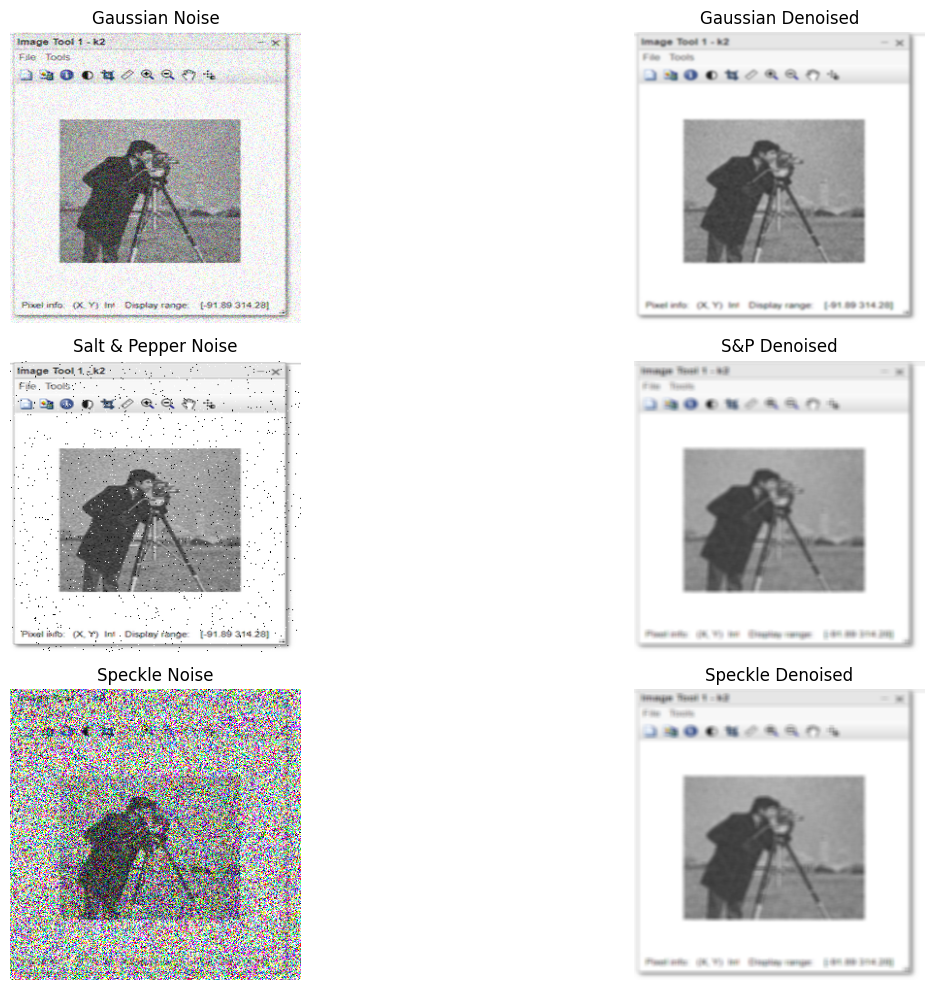

In [7]:
gaussian_denoised =   cv2.blur(img, (5, 5))


# --- 2. Denoise Salt & Pepper Noise using Median Blur ---
sp_denoised =   cv2.blur(img, (5, 5))

# --- 3. Denoise Speckle Noise using Bilateral Filter ---
speckle_denoised =   cv2.blur(img, (5, 5))



# --- Display Original Noisy vs Denoised Images ---
images = [
    (cv2.cvtColor(gaussian_noisy, cv2.COLOR_BGR2RGB), 'Gaussian Noise'),
    (cv2.cvtColor(gaussian_denoised, cv2.COLOR_BGR2RGB), 'Gaussian Denoised'),
    (cv2.cvtColor(sp_noisy, cv2.COLOR_BGR2RGB), 'Salt & Pepper Noise'),
    (cv2.cvtColor(sp_denoised, cv2.COLOR_BGR2RGB), 'S&P Denoised'),
    (cv2.cvtColor(speckle_noisy, cv2.COLOR_BGR2RGB), 'Speckle Noise'),
    (cv2.cvtColor(speckle_denoised, cv2.COLOR_BGR2RGB), 'Speckle Denoised')
]

plt.figure(figsize=(16, 10))
for i, (image, title) in enumerate(images):
    plt.subplot(3, 2, i+1)
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
#grayscale image

In [ ]:
#Image Feature
import cv2

img = cv2.imread('/content/drive/MyDrive/to_move/denosing.png')
print("Data type:", img.dtype)   # e.g. uint8 means 8-bit
print("Shape:", img.shape)       # (height, width, channels)


In [ ]:
#Arithmetic operation
#Addition of image
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load two images of the same size
img1 = cv2.imread('/content/drive/MyDrive/webinar1/I1.jpg')
img2 = cv2.imread('/content/drive/MyDrive/webinar1/I2.jpg')

# Resize for safety (optional)
img1 = cv2.resize(img1, (300, 300))
img2 = cv2.resize(img2, (300, 300))

# Add images
added = cv2.add(img1, img2)

# Subtract images

# Display
titles = ['Image 1', 'Image 2', 'Added']
images = [img1, img2, added]

plt.figure(figsize=(12,8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
#Zoom out the image and give a vertical flip
#Transformation
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
img = cv2.imread('/content/drive/MyDrive/webinar1/task/task1_image.jpg')
img = cv2.resize(img, (300, 300))
rows, cols = img.shape[:2]

# 1. Translation (move right 50, down 30)
M_translate = np.float32([[1, 0, 50], [0, 1, 30]])
translated = cv2.warpAffine(img, M_translate, (cols, rows))

# 2. Rotation (45 degrees around center)
center = (cols // 2, rows // 2)
M_rotate = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated = cv2.warpAffine(img, M_rotate, (cols, rows))

# 3. Scaling (reduce to 50%)
scaled = cv2.resize(img, None, fx=0.9, fy=0.5, interpolation=cv2.INTER_LINEAR)

# 4. Shearing (x-direction shear)
M_shear = np.float32([[1, 0.5, 0], [0, 1, 0]])
sheared = cv2.warpAffine(img, M_shear, (int(cols * 1.5), rows))

# # 5. Affine Transform (based on 3 points)
# pts1 = np.float32([[50, 50], [200, 50], [50, 200]])
# pts2 = np.float32([[10, 100], [200, 50], [100, 250]])
# M_affine = cv2.getAffineTransform(pts1, pts2)
# affine_transformed = cv2.warpAffine(img, M_affine, (cols, rows))

# 6. Perspective Transform (based on 4 points)
pts1 = np.float32([[50, 50], [250, 50], [50, 250], [250, 250]])
pts2 = np.float32([[0, 0], [300, 50], [50, 300], [300, 300]])
M_perspective = cv2.getPerspectiveTransform(pts1, pts2)
perspective_transformed = cv2.warpPerspective(img, M_perspective, (cols, rows))

# 7. Flipping (horizontal flip)
flipped = cv2.flip(img, 0)

# Show results
titles = ['Original', 'Translated', 'Rotated', 'Scaled', 'Sheared',
          #'Affine Transform',
          'Perspective Transform', 'Flipped']
images = [img, translated, rotated, scaled, sheared,# affine_transformed,
          perspective_transformed, flipped]

plt.figure(figsize=(15, 10))
for i in range(len(images)):
    plt.subplot(2, 4, i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load image in BGR format (OpenCV default)
img_bgr = cv2.imread('/content/drive/MyDrive/webinar1/task/task1_image.jpg')
img_bgr = cv2.resize(img_bgr, (300, 300))

# Convert to various color spaces
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)


# Display all color spaces
titles = ['Original (RGB)', 'Grayscale'
#, 'HSV', 'LAB', 'YCrCb'
          ]
images = [img_rgb, img_gray#, img_hsv, img_lab, img_ycrcb
          ]

plt.figure(figsize=(15, 10))
for i in range(len(images)):
    plt.subplot(2, 3, i+1)
    if len(images[i].shape) == 2:
        plt.imshow(images[i], cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB) if titles[i] != 'Original (RGB)' else images[i])
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
#Colour Conversion
img_bgr = cv2.resize(img_bgr, (300, 300))

# Convert to various color spaces
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

In [ ]:
#Edge Detection

In [ ]:
    erosion = cv2.erode(edges, kernel, iterations=1)
    dilation = cv2.dilate(edges, kernel, iterations=1)
    opening = cv2.morphologyEx(edges, cv2.MORPH_OPEN, kernel)
    closing = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)
    gradient = cv2.morphologyEx(edges, cv2.MORPH_GRADIENT, kernel)
    tophat = cv2.morphologyEx(edges, cv2.MORPH_TOPHAT, kernel)
    blackhat = cv2.morphologyEx(edges, cv2.MORPH_BLACKHAT, kernel)